# **MACHINE LEARNING PROJECT**
## **Directing Customers to Subscription Products through App Behavior Analysis**


In today's market many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid products, which originate from free ones, are ***YouTube Red, Pandora Premium, Audible Subscription, YouTube Premium***, and You Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

- **Market:** The target audience is customers who use a company's free products. In this case study, this refers to users who installed (and used) the companies free mobile app.

- **Product:** The paid memberships often provide enhanced versions of the free products already given for free, alongside new features. For example, ***`Youtube Red allows you to leave the app while still listening to a video.`***


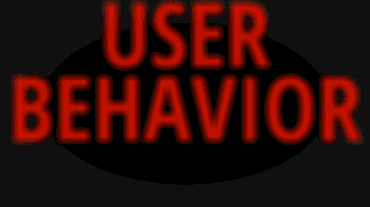

 ### **GOAL OF THE PROJECT:** 
 _**The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to ***`convert`*** them to paid users.**_

###  **BUSINESS CASE:** 
- In this Case Study we will be working for a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked.

- The company has tasked you to identify which users will mostly likely NOT enroll in paid products, so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.


### **ABOUT DATA**
- By working for the company. We have access to each customer's app behavior data. This data allows us to see the date & time of app installation, as well as the features the users engaged with within the app. App behavior is characterized as the list of app screens the user looked at, and whether the user played the financial mini-games available.
- The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trail is over.

- The Data for this project is from manufacturing fields based on trends found in real world case studies. The fields  describe what companies usually track from their users.

**Data Description**

- **User** : this is Unique id of each perticuter user of app

- **first_open** : this is the date/month/year, time the user frist time open the app

- **dayofweek** : this shows the day out of 7 days a week an user join the app where 0:Sunday & 6:Saturday

- **hour** : This is outoff 24 hour of day the user 1st open the app

- **age** : This is simply the age of the user

- **screen_list** : This describe the every single screen name the user visited in that 1st 24-hour (screen name seperated by comma)

- **numscreens** : The Number of screen the user visited in 1st 24 hour

- **minigame** : The app has minigame feature, this shows whether the player played any minigame of Not (1:Played, 0: Not Played)

- **liked** : There are like button for each feature in the app, shows whether the user cliked any like button of any feature in app or NOT (1: click like button, 0: Not clicked)

- **used_premium_feature** : This shows whether the user used any premium feature (that is for free in 1st 24 hour) or not in 1st 24 hour (1: used, 0: not used)

- **enrolled** : This is target that shows whether the user enrolled to premium after the free trial (1: enrolled, 0: not enrolled)

- **enrolled_date** : date & time of enrollment to premium product if they enrolled to premium



### **IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from dateutil import parser
import datetime

### **LOAD THE DATA**


In [53]:
df = pd.read_csv('appdata10.csv')

In [3]:
df.head(2)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,27-12-2012 02:14,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,02-12-2012 01:16,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN


In [4]:
df.shape

(50000, 12)

we have 50000 users on the basis of 11 independent & one target variable

**BASIC CHECKS**

In [5]:
df.describe()

,user,dayofweek,age,numscreens,minigame,liked,used_premium_feature,enrolled
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.165000,0.172020,0.621480
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.371184,0.377402,0.485023
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


- Here we can see that average age of user is around 32
- On an average, user visits 21 screens, also 10% of user plays minigame, 16% of users liked features of app, 17% of user used premium features of app & 62% enrolled to premium

In [54]:
# Let's convert the hour column into the integer format
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [7]:
df.head(1)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,27-12-2012 02:14,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN


In [55]:
# To plot, lets create dataframe with only numerical columns
df1 = df.copy().drop(columns=['user','first_open','screen_list','enrolled_date','enrolled'])

In [5]:
df1.head(1)

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature
0,3,2,23,15,0,0,0


## **EXPLORATORY DATA ANALYSIS**

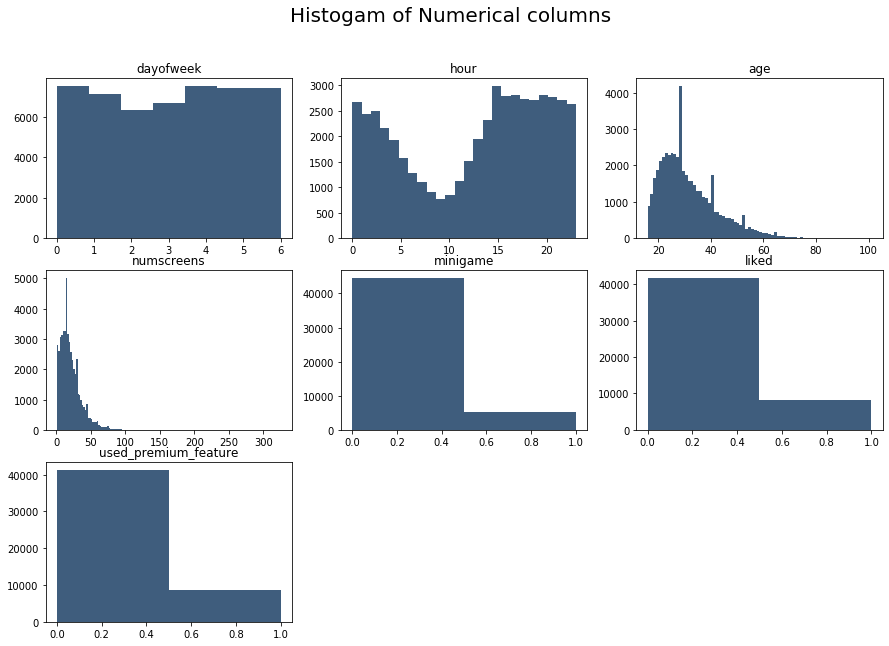

In [10]:
# Let's Plot Histogram for all numerical columns to know the disribution of these features
plt.figure(figsize=(15,10))
plt.suptitle('Histogam of Numerical columns', fontsize= 20)
for i in range(1, df1.shape[1] + 1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df1.columns.values[i-1])
    
    vals = np.size(df1.iloc[:,i-1].unique())
    
    plt.hist(df1.iloc[:,i-1], bins=vals, color='#3F5D7D')

Observations:
- Most of the users join app during weekends
- Most of the users 1st open the app around 15 that is around 3PM
- Most of users are aged around 30 Years
- Most of users visited around 20 screens of app
- Not many users played any minigames
- Not many users press the like button
- Not many user used premium feature in 1st 24 hours

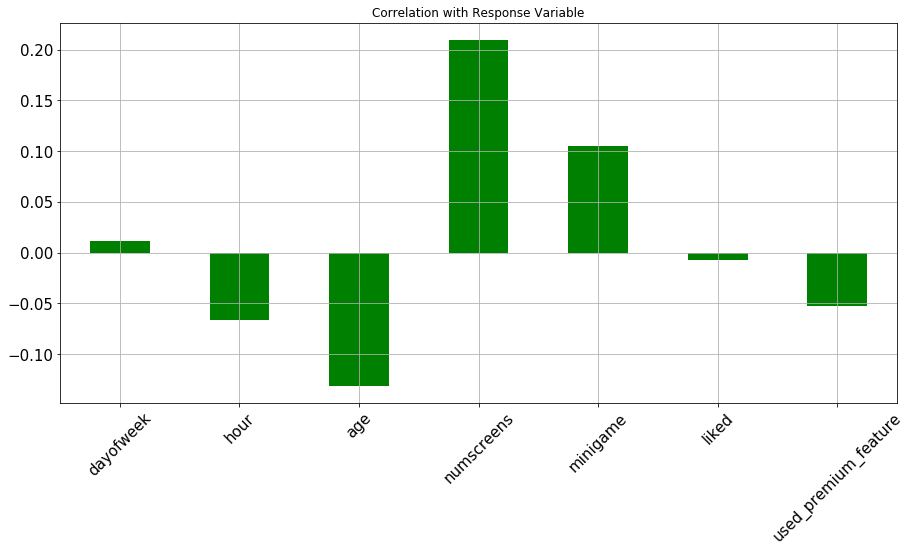

In [11]:
# Let's see the correlation between independent features & response variable
df1.corrwith(df.enrolled).plot.bar(figsize=(15,7),title='Correlation with Response Variable',
                                   fontsize=15, rot=45, grid=True, color='Green')

Observarions:
- dayofweek is least positively correlated & says that if you join the app in day 0(sunday) then their is most likely to get enrolled to the premium features
- Hour is negatively correlated with target variable shows the earlier the hour(in night) the most likely to get enrolled
- age is also negatively correlated reflects that the younger users are most likely to get enrolled
- Numscreen is positively correlated with target shows that more the no. of screen user visits more chances of getting enrolled
- minigame also shows that more the minigame user play more chances of getting enrolled
- liked is very least negative which does not have much impact in target
- interestingly used_premium_feature is negatively correlated with response meaning that if user used the premium feature in 1st 24 hour that he/she might not enroll after the trial version of premium features

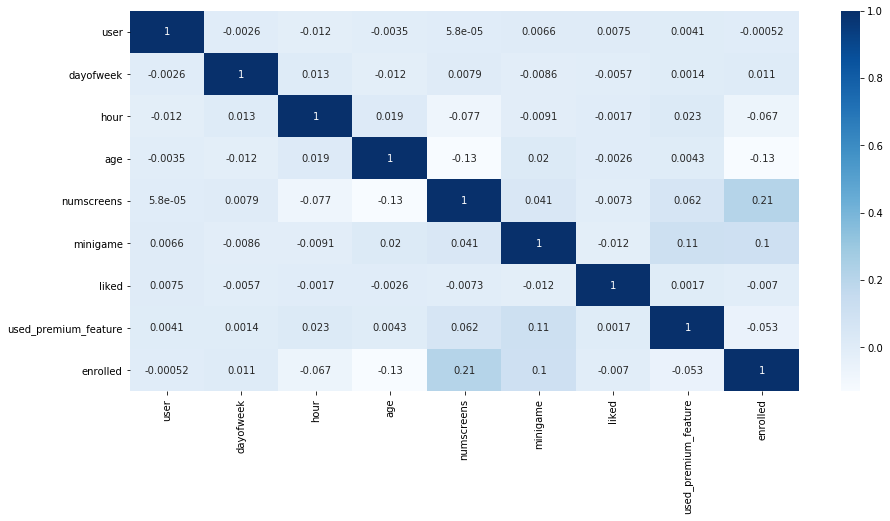

In [12]:
# Let's see the correlation matrix to see the relation between all the feature in the dataset, also can see the linear relation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

**All the independent features are having very less correlation among themselves, so their is very less chance of multicollinearity problem**




In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null int32
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
liked                   50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [56]:
# converting date column into std python date formate
df['first_open'] = pd.to_datetime(df['first_open'])
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null datetime64[ns]
dayofweek               50000 non-null int64
hour                    50000 non-null int32
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
liked                   50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [57]:
# Let's create a new feature of difference between dates in hours to find the cut-off for enrolled
df['Date_Delta_in_Hour'] = (df.enrolled_date-df.first_open).abs().astype('timedelta64[h]')

In [42]:
df.Date_Delta_in_Hour[df.Date_Delta_in_Hour<0]

Series([], Name: Date_Delta_in_Hour, dtype: float64)

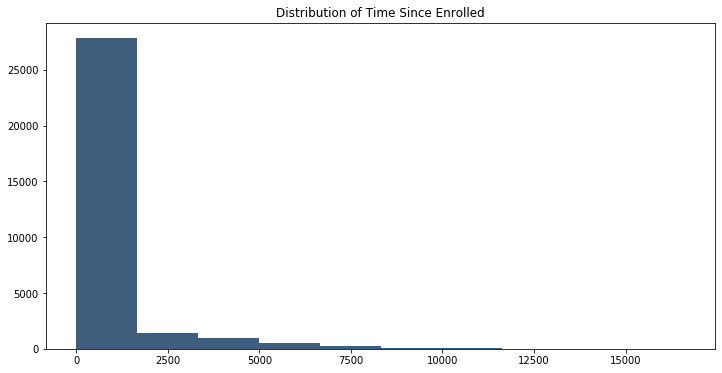

In [18]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D')
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 2000 Hour but their might be case that most enrollment is in 1st 100 or 500 hours, lets zoom the plot

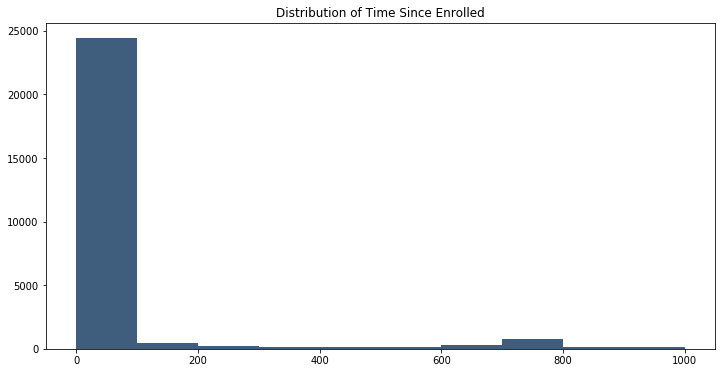

In [19]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,1000])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 100 Hour but let's zoom the plot again

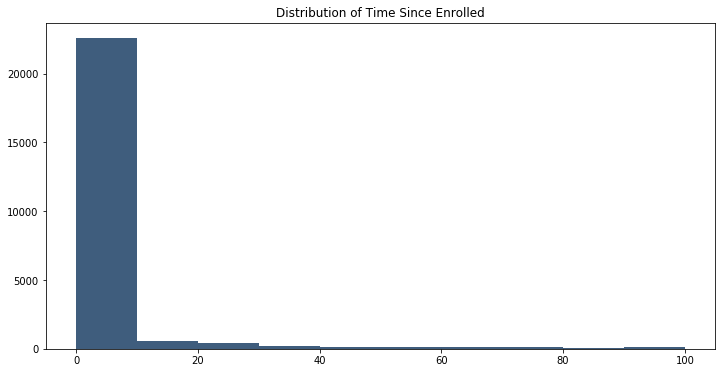

In [20]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,100])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 10 Hour but let's zoom the plot a bit more

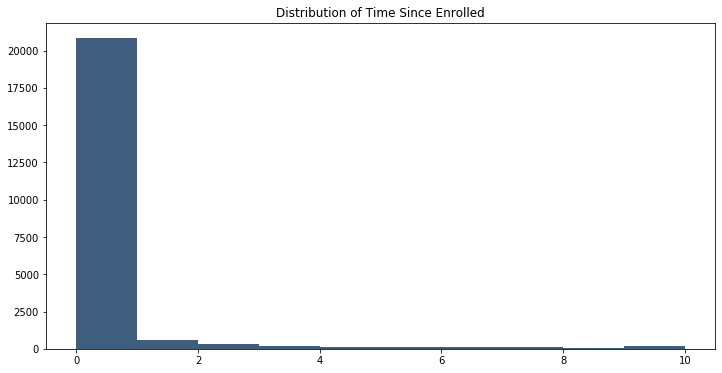

In [21]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,10])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 1 Hour but let's zoom the plot one more time

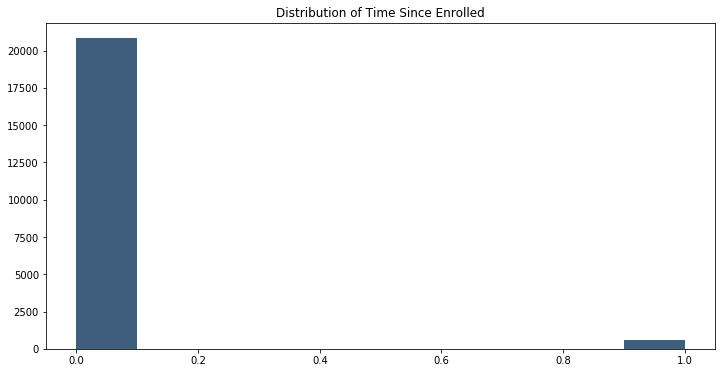

In [22]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,1])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 10% of hour that is in 1st 6 minutes but let's zoom again

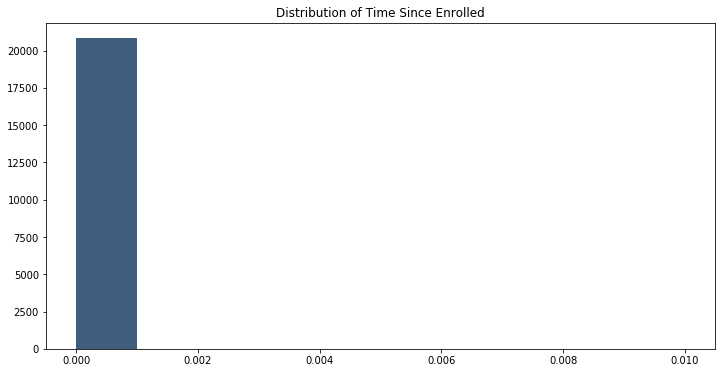

In [23]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#3F5D7D', range=[0,.01])
plt.title('Distribution of Time Since Enrolled')
plt.show()

***Here we conclude that most of users (more that 20000 out-off total 50000 users) do not used the 1st 24 hour premium free trial & infact they direcly jumped to the premium at the time of they 1st open the app***

We choose cut-off as 48 hours that is whoever difference is less than 48 is classified as enrolled else not

In [58]:
df.loc[df.Date_Delta_in_Hour>48, 'enrolled'] = 0

In [25]:
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date,Date_Delta_in_Hour
0,235136,2012-12-27 02:14:00,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaT,NaN
1,333588,2012-02-12 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaT,NaN
2,254414,2013-03-19 19:19:00,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0,NaT,NaN
3,234192,2013-05-07 16:08:00,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,2013-05-07 16:11:00,0.0
4,51549,2013-02-26 18:50:00,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,2013-02-26 18:56:00,0.0
5,56480,2013-03-04 09:58:00,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,0,1,2013-03-04 09:59:00,0.0
6,144649,2012-12-25 02:33:00,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,0,NaT,NaN
7,249366,2012-11-12 03:07:00,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,0,1,0,NaT,NaN
8,372004,2013-03-20 14:22:00,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,0,1,0,2013-04-27 22:24:00,920.0
9,338013,2013-04-26 18:22:00,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,0,1,2013-04-26 18:31:00,0.0


---
### **FEATURE ENGINEERING** 

In [59]:
df.drop(columns=['first_open','enrolled_date','Date_Delta_in_Hour'],inplace=True)

In [60]:
# Formatting the screen_list field: We have popular screenlist file & we use it to create new columns & for rest we calculate
# their count
top_screens = pd.read_csv('top_screens.csv').top_screens.values
df['screen_list'] = df.screen_list.astype('str') + ','

# Here we create new columns of popular screen lists 
for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+',','')

In [61]:
pd.read_csv('top_screens.csv').top_screens.head()

0               Loan2
1            location
2        Institutions
3    Credit3Container
4         VerifyPhone
Name: top_screens, dtype: object

In [62]:
# Here we create a new column which denotes all other screen count
df['Other_screens'] = df.screen_list.str.count(',')
# Also we gona drop the column of screen_list as it's not of importance
df.drop(columns=['screen_list'], inplace=True)

**`Funnels : Funnels are group of screens that belong to same set There are many screens that are correlated with eachother, and
we don''t want correlated screens coz it's not good idea for the model`**

In [63]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'liked',
       'used_premium_feature', 'enrolled', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [64]:
# Saving Screens
savings_screens = ['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']
df['SavingsCount'] = df[savings_screens].sum(axis=1)
# Droping all the columns under savings_screens
df.drop(columns=savings_screens,inplace=True)

# Credit Monitoring Screens
cm_screens = ['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
df['CMCount'] = df[cm_screens].sum(axis=1)
# Droping all the columns under cm_screens
df.drop(columns= cm_screens,inplace=True)

# Credit Card Screens
cc_screens = ['CC1','CC1Category','CC3']
df['CCCount'] = df[cc_screens].sum(axis=1)
# Droping all the columns under cc_screens
df.drop(columns= cc_screens,inplace=True)

# Loan Screens
loan_screens = ['Loan','Loan2','Loan3','Loan4']
df['LoanCount'] = df[loan_screens].sum(axis=1)
# Droping all the columns under loan_screens
df.drop(columns= loan_screens,inplace=True)

In [65]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'liked',
       'used_premium_feature', 'enrolled', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other_screens',
       'SavingsCount', 'CMCount', 'CCCount', 'LoanCount'],
      dtype='object')

In [66]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other_screens,SavingsCount,CMCount,CCCount,LoanCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.165000,0.172020,0.477960,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.371184,0.377402,0.499519,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


---
### **DATA PREPROCESSING  & FEATURE SCALING** 

In [67]:
response = df['enrolled']
df.drop(columns='enrolled',inplace=True)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, response, test_size=0.2, random_state=0)

In [135]:
# we can not put user id in our model & also can not drop it as it is an identifier for each user, so let's keep it some where 
# as variable
train_id = X_train['user']
X_train.drop(columns='user',inplace=True)

test_id = X_test['user']
X_test.drop(columns='user',inplace=True)

We will scale the features using StandardScalar to avoid the dominance of perticular feature in entire model

In [136]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train),columns=df.columns[1:])
X_test = pd.DataFrame(sc_X.transform(X_test),columns=df.columns[1:])

In [71]:
X_train.head(2)

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other_screens,SavingsCount,CMCount,CCCount,LoanCount
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.246319,2.186018,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.445173,-0.457453,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800


In [72]:
X_test.head(2)

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other_screens,SavingsCount,CMCount,CCCount,LoanCount
0,-1.489818,-1.553579,0.856728,0.819520,-0.34683,2.246319,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.296641,-0.260877,-0.763372,-0.289185,-1.165789
1,0.972325,-0.881364,-0.528611,0.564865,-0.34683,-0.445173,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,0.309800


In [142]:
X_train.shape, X_test.shape

((40000, 48), (10000, 48))

## **MODEL BUILDING**
#### **LOGISTIC REGRESSION** 
#### MODEL TRAINING

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

param_grid = {'C':[100,10,1,.1,.01,.001], 'penalty' : ['l1','l2']}
log_model = GridSearchCV(LogisticRegression(C=1),param_grid=param_grid)
log_model.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [144]:
log_model.best_params_

{'C': 100, 'penalty': 'l2'}

In [145]:
for params, score in zip(log_model.cv_results_['params'],log_model.cv_results_['mean_test_score']):
    print(params,score)

{'C': 100, 'penalty': 'l1'} 0.777075
{'C': 100, 'penalty': 'l2'} 0.7771
{'C': 10, 'penalty': 'l1'} 0.777075
{'C': 10, 'penalty': 'l2'} 0.7771
{'C': 1, 'penalty': 'l1'} 0.77695
{'C': 1, 'penalty': 'l2'} 0.7771
{'C': 0.1, 'penalty': 'l1'} 0.7768
{'C': 0.1, 'penalty': 'l2'} 0.777
{'C': 0.01, 'penalty': 'l1'} 0.77555
{'C': 0.01, 'penalty': 'l2'} 0.776925
{'C': 0.001, 'penalty': 'l1'} 0.75695
{'C': 0.001, 'penalty': 'l2'} 0.7725


***we will use 'L1' penalty as we might have correlated features like screens & 'L1' penalises any such fields that are strongly
correlated with response variable, this is because there will always be one screen that is just before the enrollment screen which imply that the correlation will be higher for that screen with enrollment screen ==> higher weight to that screen***

In [146]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=100, penalty='l1')
classifier.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


#### **MODEL EVALUATION & PREDICTION**

Out of 2154 Users..


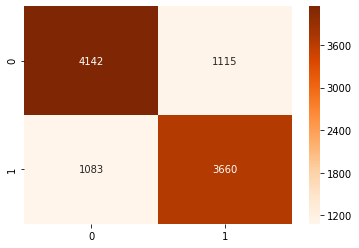

In [214]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score 
cm = confusion_matrix(y_test,y_pred)
print('Out of 2154 Users..')
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges')
plt.show()

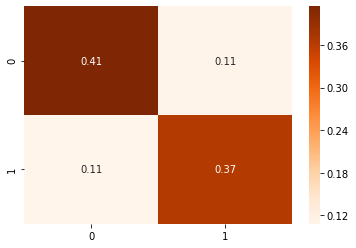

In [190]:
sns.heatmap(cm/cm.sum(),annot=True,cmap='Oranges')
plt.show()

- Model Accuracy = sum of diagonal value of cm/sum of all values of cm(confusion matrix)
- We also look for Precision to insure that model accuracy is inceased not because of some overfitting issues
- Precision Score = True Positive / (True Positive + False Positive), meaning that out-of all predicted positives what percentage are Actual positives
- Recall Score = True Positives / (True Positives + False Negatives, meaning that out-of all Actual Positives What Percentage are predicted to be positives
- We will also calculate f1-score as it creates a balance between Precision & Recall coz it is weighted average of Precision & Recall thereby it considers both False Positives & Flase Negative Intuitively f1-score is not easy to understand as accuracy but it is much better metric in case of class imbalanced data as in our case
- F1-Score = Precision*Recall / (Precision+Recall)

In [188]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score 
cm = confusion_matrix(y_test,y_pred)
print('Classification Report: ','\n',classification_report(y_test,y_pred))

print('Model Accuracy :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('Recall Score : ',recall_score(y_test,y_pred))
print('F1-Score : ',f1_score(y_test,y_pred))

Classification Report:  
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      5257
           1       0.77      0.77      0.77      4743

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Model Accuracy : 0.7802
Precision Score : 0.7664921465968586
Recall Score :  0.7716635041113219
F1-Score :  0.7690691321706241


**Sensitivity or TPR = TP/(TP+FN)**      

**Specificity = TN/(TN+FP),  (1-Specificity)=FPR**

In [191]:
Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
Specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('% of comapanies correctely identified who withdrawal from rating: ',Sensitivity, 
      ',  % of comapanies correctely identified who not withdrawal from rating: ',Specificity)

% of comapanies correctely identified who withdrawal from rating:  0.7716635041113219 ,  % of comapanies correctely identified who not withdrawal from rating:  0.7879018451588359


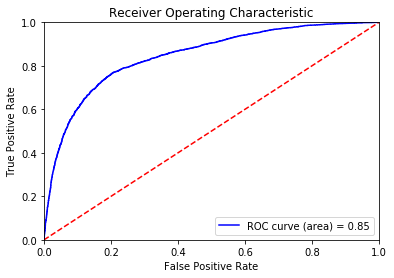

In [192]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_prob = classifier.predict_proba(X_test)
preds = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC curve (area) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Here Area under ROC curve covers 85% which implies that the 85% of time model distinguish the 2 classes correctly**


**PREDICTIONS**

In [193]:
enrollmeant_Prob = classifier.predict_proba(X_test)
enrollmeant_Prob

array([[0.11905279, 0.88094721],
       [0.3915526 , 0.6084474 ],
       [0.92172887, 0.07827113],
       ...,
       [0.92668999, 0.07331001],
       [0.38370388, 0.61629612],
       [0.54973711, 0.45026289]])

In [194]:
enrollmeant_Prob[:,1]

array([0.88094721, 0.6084474 , 0.07827113, ..., 0.07331001, 0.61629612,
       0.45026289])

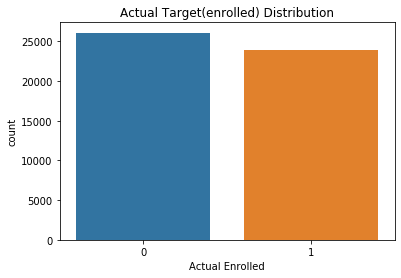

In [163]:
sns.countplot(response)
plt.title('Actual Target(enrolled) Distribution')
plt.xlabel('Actual Enrolled')
plt.show()

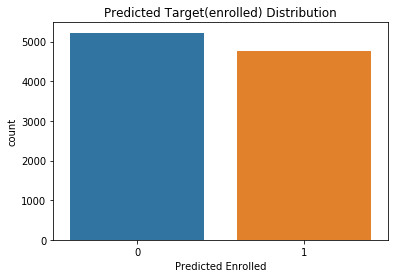

In [164]:
sns.countplot(pd.DataFrame(classifier.predict(X_test))[0])
plt.title('Predicted Target(enrolled) Distribution')
plt.xlabel('Predicted Enrolled')
plt.show()

`From both the plots we can conclude that both Actual & Predicted values follows same class distribution`

---
**FEATURE IMPORTANCE**

In [156]:
weights = pd.Series(classifier.coef_[0],index=X_train.columns.values)
weights.sort_values(ascending = False)

Other_screens              0.954137
VerifyPhone                0.670542
CMCount                    0.621183
VerifyMobile               0.318663
idscreen                   0.152806
VerifyDateOfBirth          0.135386
VerifyAnnualIncome         0.084320
VerifyHousing              0.057985
BankVerification           0.052293
Rewards                    0.044533
VerifyHousingAmount        0.042174
EditProfile                0.042046
Splash                     0.037827
CCCount                    0.025287
dayofweek                  0.019866
SecurityModal              0.014912
liked                      0.012874
Finances                   0.011792
Cycle                      0.009833
ProfileEducation           0.006169
RewardDetail               0.000229
ProfileChildren            0.000000
NetworkFailure            -0.002069
Leaderboard               -0.008055
RewardsContainer          -0.010454
ProfileJobTitle           -0.012453
SavingsCount              -0.013428
location                  -0

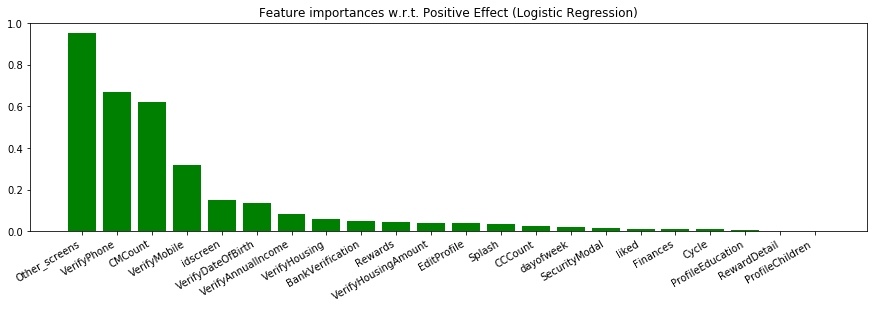

In [157]:
coefs = classifier.coef_[0]
indices = np.argsort(coefs)[::-1]

plt.figure(figsize=(15,5))
plt.title("Feature importances w.r.t. Positive Effect (Logistic Regression)")
plt.bar(range(22), coefs[indices[:22]],
       color="g", align="center")
plt.xticks(range(22), weights.sort_values(ascending = False).index, rotation=30, ha='right')
plt.subplots_adjust(bottom=0.3)

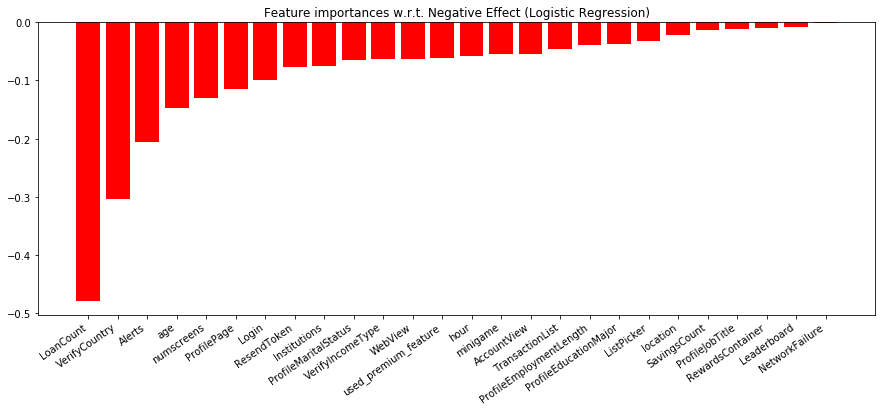

In [158]:
coefs = classifier.coef_[0]
indices = np.argsort(coefs)

plt.figure(figsize=(15,7))
plt.title("Feature importances w.r.t. Negative Effect (Logistic Regression)")
plt.bar(range(26), coefs[indices[:26]],
       color="r", align="center")
plt.xticks(range(26), weights.sort_values(ascending = True).index, rotation=35, ha='right')
plt.subplots_adjust(bottom=0.3)

---
### **CONCLUSIONS & FINAL RESULTS**

- **Positively Affecting features to enrollment:** Other_sceens, VerifyPhone, CMCount, VerifyMobile, VerifyDateOfBirth, Rewards, EditProfile, etc, without any doubt all above features are situated to moving towards the enrollment screens.
- **Negatively Affecting features to enrollment:** LoanCount, VerifyCountry, Alerts, age, numscreens, Login, ResendToken, etc, if we see all these features are irritating & no user want to do this.

In [208]:
Final_Results = pd.concat([y_test,test_id],axis=1).dropna()

In [209]:
Final_Results['enrollment_Prob'] = enrollmeant_Prob[:,1]
Final_Results['Predicted Results'] = y_pred

***`Here below we can see users with highest probability in enrolling into the Premium features of App`***

In [211]:
Final_Results = Final_Results[['user','enrolled','Predicted Results','enrollment_Prob']].reset_index(drop=True)
Final_Results.sort_values(by ='enrollment_Prob',  ascending = False)

,user,enrolled,Predicted Results,enrollment_Prob
1849,319395,1,1,0.996377
6018,246990,0,1,0.994527
2822,131939,1,1,0.994455
9420,148005,1,1,0.994274
6386,128129,0,1,0.991395
3098,7876,1,1,0.990641
2222,15539,1,1,0.990289
9959,215896,1,1,0.989665
6210,122315,1,1,0.989434
3909,332232,1,1,0.989207
